In [5]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

Exercise 1

In [8]:
data_frame = pd.read_csv("Data_for_UCI_named.csv")
column_index = [4,12]
final_dataframe = data_frame.drop(data_frame.columns[column_index],axis=1)
final_dataframe['stabf']=final_dataframe['stabf'].replace('stable',1)
final_dataframe['stabf']=final_dataframe['stabf'].replace('unstable',0)
full_train, test=train_test_split(final_dataframe, test_size =0.2)
train, valid = train_test_split(full_train, test_size=0.25)

In [41]:
full_train.head()

,tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4,stabf
8357,6.831522,9.605821,7.707207,6.426386,-1.647183,-1.447027,-1.742941,0.511570,0.912095,0.748709,0.906299,0
5592,3.484051,3.261583,3.061933,2.984940,-1.018964,-1.372214,-1.889375,0.487419,0.902059,0.599310,0.802854,0
3665,2.972286,2.579233,0.926517,8.833689,-1.604793,-1.198811,-0.549650,0.996005,0.959735,0.211077,0.983521,0
4130,9.554098,6.625059,9.896289,4.121128,-0.757897,-1.813831,-1.458751,0.512356,0.942064,0.767771,0.617934,0
1360,9.557971,8.487566,2.432568,5.088019,-0.811854,-1.302207,-0.647525,0.944900,0.905103,0.215608,0.389183,0


In [42]:
test.head()

,tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4,stabf
3754,2.468742,7.671176,2.418067,3.299449,-1.610861,-1.502488,-1.299532,0.733945,0.168359,0.914492,0.671303,0
7667,2.610082,7.198513,2.609164,1.564472,-1.639458,-1.912802,-0.577513,0.888177,0.283483,0.195373,0.959492,1
3122,4.506769,7.175377,3.168881,1.619786,-1.427366,-0.725996,-1.427176,0.392040,0.229182,0.873777,0.964562,1
1456,2.423343,5.279390,4.876993,2.621016,-0.787757,-0.921840,-1.991847,0.702972,0.850101,0.664613,0.273731,0
2886,1.605235,1.270205,9.453592,2.621835,-0.815962,-0.689892,-1.044414,0.887779,0.496484,0.277912,0.326237,1


In [43]:
train.head()

,tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4,stabf
8393,5.500377,6.675807,8.868063,9.806539,-0.788522,-1.349178,-1.935424,0.784209,0.579662,0.172421,0.985948,0
7485,7.954243,6.737250,5.094449,2.664001,-1.834643,-1.009745,-0.863763,0.271794,0.777054,0.358477,0.806230,0
6395,8.518567,0.973923,4.099282,0.596253,-1.872408,-0.790888,-1.550130,0.397787,0.219231,0.713029,0.232874,1
5585,9.952270,8.347632,1.787218,8.658657,-0.606895,-0.636397,-1.281679,0.278151,0.095874,0.772223,0.258195,1
8316,2.062831,6.213706,7.058782,2.289422,-0.757054,-0.525209,-1.030996,0.258542,0.424002,0.973738,0.649170,0


In [44]:
valid.head()

,tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4,stabf
9118,3.043484,5.146240,1.890599,8.331976,-1.180432,-0.690838,-0.832173,0.232630,0.409553,0.361492,0.477005,1
9227,4.179069,4.469472,9.471745,4.740743,-1.611811,-1.123787,-0.641480,0.537114,0.286531,0.647801,0.452676,0
687,8.254805,7.196505,6.642446,8.366604,-1.037418,-1.487353,-1.403080,0.334032,0.921507,0.901161,0.623503,0
6298,7.192600,9.793865,6.741471,6.621450,-1.675539,-0.783365,-1.132204,0.135912,0.410529,0.489494,0.624640,0
5744,6.111503,8.329410,3.088199,7.279466,-1.013397,-1.785272,-1.017576,0.560290,0.833881,0.128731,0.761363,0


Exercise 2

In [9]:
train_predictor = full_train.iloc[:,0:11]
train_target = full_train.iloc[:,11]
gini_tree = DecisionTreeClassifier(criterion='gini', max_depth = 5)
gini_model=gini_tree.fit(train_predictor,train_target)

In [12]:
train_predictor = train.iloc[:,0:11]
train_target = train.iloc[:,11]
gini_tree = DecisionTreeClassifier(criterion='gini', max_depth = 5)
gini_model=gini_tree.fit(train_predictor,train_target)

test_predictor = test.iloc[:,0:11]
test_target = test.iloc[:,11]
prob_dt=gini_model.predict_proba(test_predictor)
entropy3 = log_loss(test_target,prob_dt)
print("TGini cross Entropy = ",entropy3)

TGini cross Entropy =  0.4772320301116412


Exercise 3.

In [47]:
train_x = train.iloc[:,0:11]
train_y = train.iloc[:,11]
valid_x = valid.iloc[:,0:11]
valid_y = valid.iloc[:,11]

#Initializing the MLPClassifier
classifier1 = MLPClassifier(hidden_layer_sizes=(20))
classifier2 = MLPClassifier(hidden_layer_sizes=(10,10))

classifier1.fit(train_x, train_y)
classifier2.fit(train_x, train_y)
#classifier1.fit(valid_x, valid_y)

predict1_y = classifier1.predict_proba(valid_x)
predict2_y = classifier2.predict_proba(valid_x)

result_1 = log_loss(valid_y.values, predict1_y)
result_2 = log_loss(valid_y.values, predict2_y)

print(result_1)
print(result_2)

#result 2 is better we choose the second classifier



C:\Users\Reza\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1985260043167353
0.17139769345064057


C:\Users\Reza\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
selected_classifier = MLPClassifier(hidden_layer_sizes=(10, 10))
selected_classifier.fit(train_predictor, train_target)
prob_mlp = selected_classifier.predict_proba(test_predictor)
result_3 = log_loss(test_target, prob_mlp)
print(result_3)

0.15158691461942403


C:\Users\Reza\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exercise 4.

In [18]:
num_tree = [5, 10, 50, 100, 200]

for i in num_tree:
    classifier1 = RandomForestClassifier(i)
    classifier1.fit(train_x, train_y)
    predict1_y = classifier1.predict_proba(valid_x)
    result_1 = log_loss(valid_y.values, predict1_y)
    print(i)
    print(result_1)

5
0.6539327886826928
10
0.3093198241386913
50
0.27238517166111154
100
0.27191316795470793
200
0.2706685616874499


In [19]:
# tree with 200 is selected (best)
selected_classifier = RandomForestClassifier(200)
selected_classifier.fit(train_predictor, train_target)
prob_rf = selected_classifier.predict_proba(test_predictor)
result_3 = log_loss(test_target, prob_rf)
print(result_3)

0.26413026222111285


Exercise 5.

In [20]:
arr = [20, 40, 60]

for i in arr:
    classifier1 = AdaBoostClassifier(n_estimators= i)
    classifier1.fit(train_x, train_y)
    predict1_y = classifier1.predict_proba(valid_x)
    result_1 = log_loss(valid_y.values, predict1_y)
    print(i)
    print(result_1)


20
0.6399720002030671
40
0.658762841155889
60
0.6679598583724627


In [22]:
# arr with 20 is selected (best)
selected_classifier = AdaBoostClassifier(n_estimators=20)
selected_classifier.fit(train_predictor, train_target)
prob_adb = selected_classifier.predict_proba(test_predictor)
result_3 = log_loss(test_target, prob_adb)
print(result_3)

0.6421384577979186


Exercise 6.

In [36]:
def ROC(T, pred, act):
  thres = {}  
  TPR = []
  FPR = []
  DIFF = []
  pred_prob = pred[:,1]  
  for i in T:
    pred_t = np.where(pred_prob < i, 0, 1)
    TP,TN,FP,FN = Calc(pred_t, act)
    POD = TP/(TP + FN)
    TPR.append(POD)
    POFD = FP/(FP + TN)
    FPR.append(POFD)
    Sen = TP/(TP + FN)
    Spe = TN/(TN + FP)
    DIFF.append(Sen + Spe -1)
  return TPR, FPR, DIFF

def Calc(Pred_t, act):
  TN = TP = FP = FN = 0
  for i, j in np.nditer([Pred_t, act]):
    if i == 1:
      if j == 1:
        TP += 1
      else:
        FP += 1
    else:
      if j == 1:
        FN += 1
      else:
        TN += 1
  return TP,TN,FP,FN


def youden(DIFF, Thres):
  Youden = max(DIFF)
  Thresc = Thres[DIFF.index(Youden)]
  print("Highest youden: {} with threshold: {}".format(Youden,Thresc))
  return Youden, Thresc



def ROC_plt(TPR, FPR, DIFF, model):
  ref = [i*.1 for i in range(0,11)]
  plt.plot(ref, ref, color = 'blue', linestyle='dashed')
  plt.plot(FPR, TPR, color = 'red')
  plt.ylabel('TPR')
  plt.xlabel('FPR')
  plt.title("ROC Curve: " + model)
  plt.show()

def Eval(act, pred, m):
  T = []
  for i in range (0, 1001):
    T.append(i/1000)
  TPR, FPR, DIFF = ROC(T, pred, act)
  ROC_plt(TPR, FPR, DIFF, m)
  youden(DIFF, T)
  area(TPR,T)


def area(TPR,Thrs): 
  bin_num = (len(Thrs) - 1)
  width = (1 / bin_num)
  Area = 0
  for i in TPR:
    Area += width * i
  print("The Area under curve:", Area)
  return Area

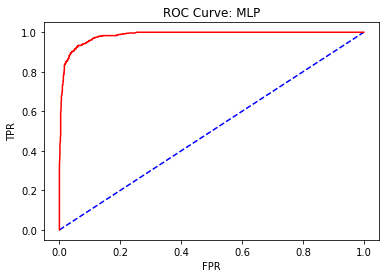

Highest youden: 0.8717574001592707 with threshold: 0.463
The Area under curve: 0.881179319371728


In [37]:
Eval(test_target, prob_mlp, "MLP")

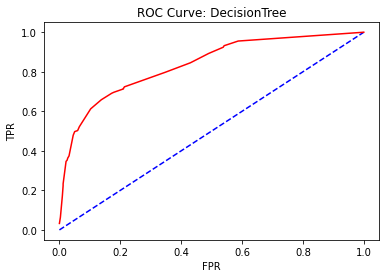

Highest youden: 0.5208365102763517 with threshold: 0.401
The Area under curve: 0.6186007853403225


In [38]:
Eval(test_target, prob_dt, "DecisionTree")

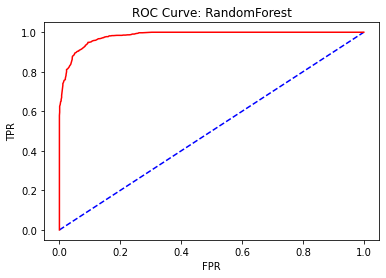

Highest youden: 0.8551017468950677 with threshold: 0.396
The Area under curve: 0.716896596858637


In [39]:
Eval(test_target, prob_rf, "RandomForest")

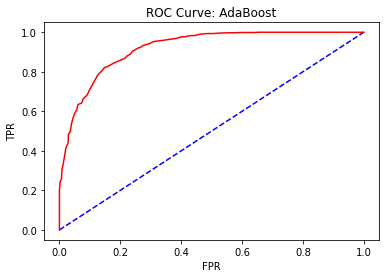

Highest youden: 0.6739312763686272 with threshold: 0.495
The Area under curve: 0.5178586387434557


In [40]:
Eval(test_target, prob_adb, "AdaBoost")